# Imports and preliminaries

In [4]:
import sklearn, ast, json, itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning: 

In [5]:
#read in dataset
data_df = pd.read_pickle('data_df.pkl')
display(data_df.head())

,word,category,freq,rank,normed_rank,d_t,d_u,d_l
0,vacation,warriner,"{1451654385.0: 15, 1454284128.0: 23, 145691387...","{1451654385.0: 5761, 1454284128.0: 4084, 14569...","{1451654385.0: 0.5243946841434554, 1454284128....","{1451654385.0: 0.8371344565315443, 1454284128....","{1451654385.0: 0.8368683380755889, 1454284128....","{1451654385.0: 0.06721858280348281, 1454284128..."
1,happiness,warriner,"{1451654385.0: 8, 1454284128.0: 8, 1456913871....","{1451654385.0: 8696, 1454284128.0: 8699, 14569...","{1451654385.0: 0.7915528854906244, 1454284128....","{1451654385.0: 0.9643101885911121, 1454284128....","{1451654385.0: 0.9641427228868676, 1454284128....","{1451654385.0: 0.08587499825414602, 1454284128..."
2,happy,warriner,"{1451654385.0: 297, 1454284128.0: 290, 1456913...","{1451654385.0: 512, 1454284128.0: 527, 1456913...","{1451654385.0: 0.04660476970689969, 1454284128...","{1451654385.0: 0.8294661285181847, 1454284128....","{1451654385.0: 0.9235548479909104, 1454284128....","{1451654385.0: -0.12747506396108843, 145428412..."
3,christmas,warriner,"{1451654385.0: 35, 1454284128.0: 30, 145691387...","{1451654385.0: 3118, 1454284128.0: 3369, 14569...","{1451654385.0: 0.2838157655197524, 1454284128....","{1451654385.0: 0.9149575729774626, 1454284128....","{1451654385.0: 0.9143243647494287, 1454284128....","{1451654385.0: 0.10002238436019528, 1454284128..."
4,enjoyment,warriner,"{1451654385.0: 33, 1454284128.0: 14, 145691387...","{1451654385.0: 3273, 1454284128.0: 5918, 14569...","{1451654385.0: 0.2979246313489896, 1454284128....","{1451654385.0: 0.9111831015005432, 1454284128....","{1451654385.0: 0.8812106845066691, 1454284128....","{1451654385.0: -0.01799965688402949, 145428412..."


In [6]:
data_df['no_freq'] = data_df['freq'].map(lambda x: all(np.isnan(y) for y in list(x.values())))
display(data_df['no_freq'].value_counts())

True     24943
False      830
Name: no_freq, dtype: int64

In [7]:
#add logs
data_df['log_freq'] = data_df['freq'].map(lambda x: {k: np.log(v) for (k, v) in x.items()})
data_df['log_rank'] = data_df['rank'].map(lambda x: {k: np.log(v) for (k, v) in x.items()})
display(data_df.head())

,word,category,freq,rank,normed_rank,d_t,d_u,d_l,no_freq,log_freq,log_rank
0,vacation,warriner,"{1451654385.0: 15, 1454284128.0: 23, 145691387...","{1451654385.0: 5761, 1454284128.0: 4084, 14569...","{1451654385.0: 0.5243946841434554, 1454284128....","{1451654385.0: 0.8371344565315443, 1454284128....","{1451654385.0: 0.8368683380755889, 1454284128....","{1451654385.0: 0.06721858280348281, 1454284128...",False,"{1451654385.0: 2.70805020110221, 1454284128.0:...","{1451654385.0: 8.658866349732383, 1454284128.0..."
1,happiness,warriner,"{1451654385.0: 8, 1454284128.0: 8, 1456913871....","{1451654385.0: 8696, 1454284128.0: 8699, 14569...","{1451654385.0: 0.7915528854906244, 1454284128....","{1451654385.0: 0.9643101885911121, 1454284128....","{1451654385.0: 0.9641427228868676, 1454284128....","{1451654385.0: 0.08587499825414602, 1454284128...",False,"{1451654385.0: 2.0794415416798357, 1454284128....","{1451654385.0: 9.070618428801046, 1454284128.0..."
2,happy,warriner,"{1451654385.0: 297, 1454284128.0: 290, 1456913...","{1451654385.0: 512, 1454284128.0: 527, 1456913...","{1451654385.0: 0.04660476970689969, 1454284128...","{1451654385.0: 0.8294661285181847, 1454284128....","{1451654385.0: 0.9235548479909104, 1454284128....","{1451654385.0: -0.12747506396108843, 145428412...",False,"{1451654385.0: 5.6937321388027, 1454284128.0: ...","{1451654385.0: 6.238324625039508, 1454284128.0..."
3,christmas,warriner,"{1451654385.0: 35, 1454284128.0: 30, 145691387...","{1451654385.0: 3118, 1454284128.0: 3369, 14569...","{1451654385.0: 0.2838157655197524, 1454284128....","{1451654385.0: 0.9149575729774626, 1454284128....","{1451654385.0: 0.9143243647494287, 1454284128....","{1451654385.0: 0.10002238436019528, 1454284128...",False,"{1451654385.0: 3.5553480614894135, 1454284128....","{1451654385.0: 8.044947049617722, 1454284128.0..."
4,enjoyment,warriner,"{1451654385.0: 33, 1454284128.0: 14, 145691387...","{1451654385.0: 3273, 1454284128.0: 5918, 14569...","{1451654385.0: 0.2979246313489896, 1454284128....","{1451654385.0: 0.9111831015005432, 1454284128....","{1451654385.0: 0.8812106845066691, 1454284128....","{1451654385.0: -0.01799965688402949, 145428412...",False,"{1451654385.0: 3.4965075614664802, 1454284128....","{1451654385.0: 8.09346227450118, 1454284128.0:..."


In [12]:
#add differences: 
data_df['freq_diff'] = data_df['freq'].map(lambda x: np.diff(list(x.values())))


data_df['freq_diff'] = data_df['freq_diff'].map(lambda x: {})
display(data_df.head())
display(data_df.iloc[0])
display(data_df.iloc[100])

,word,category,freq,rank,normed_rank,d_t,d_u,d_l,no_freq,log_freq,log_rank,freq_diff
0,vacation,warriner,"{1451654385.0: 15, 1454284128.0: 23, 145691387...","{1451654385.0: 5761, 1454284128.0: 4084, 14569...","{1451654385.0: 0.5243946841434554, 1454284128....","{1451654385.0: 0.8371344565315443, 1454284128....","{1451654385.0: 0.8368683380755889, 1454284128....","{1451654385.0: 0.06721858280348281, 1454284128...",False,"{1451654385.0: 2.70805020110221, 1454284128.0:...","{1451654385.0: 8.658866349732383, 1454284128.0...","[8, -4, -4, 3, 7, 7, -19, 7, -9, 7, 5, -2]"
1,happiness,warriner,"{1451654385.0: 8, 1454284128.0: 8, 1456913871....","{1451654385.0: 8696, 1454284128.0: 8699, 14569...","{1451654385.0: 0.7915528854906244, 1454284128....","{1451654385.0: 0.9643101885911121, 1454284128....","{1451654385.0: 0.9641427228868676, 1454284128....","{1451654385.0: 0.08587499825414602, 1454284128...",False,"{1451654385.0: 2.0794415416798357, 1454284128....","{1451654385.0: 9.070618428801046, 1454284128.0...","[0.0, -1.0, 2.0, nan, nan, -6.0, 18.0, -21.0, ..."
2,happy,warriner,"{1451654385.0: 297, 1454284128.0: 290, 1456913...","{1451654385.0: 512, 1454284128.0: 527, 1456913...","{1451654385.0: 0.04660476970689969, 1454284128...","{1451654385.0: 0.8294661285181847, 1454284128....","{1451654385.0: 0.9235548479909104, 1454284128....","{1451654385.0: -0.12747506396108843, 145428412...",False,"{1451654385.0: 5.6937321388027, 1454284128.0: ...","{1451654385.0: 6.238324625039508, 1454284128.0...","[-7, 24, 12, -15, 0, 8, -24, 20, -13, -1, 1, 29]"
3,christmas,warriner,"{1451654385.0: 35, 1454284128.0: 30, 145691387...","{1451654385.0: 3118, 1454284128.0: 3369, 14569...","{1451654385.0: 0.2838157655197524, 1454284128....","{1451654385.0: 0.9149575729774626, 1454284128....","{1451654385.0: 0.9143243647494287, 1454284128....","{1451654385.0: 0.10002238436019528, 1454284128...",False,"{1451654385.0: 3.5553480614894135, 1454284128....","{1451654385.0: 8.044947049617722, 1454284128.0...","[-5, 1, -4, -3, 1, 6, -9, 26, -12, 57, 72, -102]"
4,enjoyment,warriner,"{1451654385.0: 33, 1454284128.0: 14, 145691387...","{1451654385.0: 3273, 1454284128.0: 5918, 14569...","{1451654385.0: 0.2979246313489896, 1454284128....","{1451654385.0: 0.9111831015005432, 1454284128....","{1451654385.0: 0.8812106845066691, 1454284128....","{1451654385.0: -0.01799965688402949, 145428412...",False,"{1451654385.0: 3.4965075614664802, 1454284128....","{1451654385.0: 8.09346227450118, 1454284128.0:...","[-19, -3, 10, -13, 4, 13, -11, -4, 8, -4, 1, 4]"


word                                                    vacation
category                                                warriner
freq           {1451654385.0: 15, 1454284128.0: 23, 145691387...
rank           {1451654385.0: 5761, 1454284128.0: 4084, 14569...
normed_rank    {1451654385.0: 0.5243946841434554, 1454284128....
d_t            {1451654385.0: 0.8371344565315443, 1454284128....
d_u            {1451654385.0: 0.8368683380755889, 1454284128....
d_l            {1451654385.0: 0.06721858280348281, 1454284128...
no_freq                                                    False
log_freq       {1451654385.0: 2.70805020110221, 1454284128.0:...
log_rank       {1451654385.0: 8.658866349732383, 1454284128.0...
freq_diff             [8, -4, -4, 3, 7, 7, -19, 7, -9, 7, 5, -2]
Name: 0, dtype: object

word                                                       smart
category                                                warriner
freq           {1451654385.0: 65, 1454284128.0: 96, 145691387...
rank           {1451654385.0: 1920, 1454284128.0: 1382, 14569...
normed_rank    {1451654385.0: 0.17476788640087385, 1454284128...
d_t            {1451654385.0: 0.8716230420192538, 1454284128....
d_u            {1451654385.0: 0.8856261331737832, 1454284128....
d_l            {1451654385.0: 0.11169702829573147, 1454284128...
no_freq                                                    False
log_freq       {1451654385.0: 4.174387269895637, 1454284128.0...
log_rank       {1451654385.0: 7.560080465021827, 1454284128.0...
freq_diff      [31, -13, 6, -6, -12, 24, -15, 28, -35, 25, -2...
Name: 100, dtype: object

In [8]:
no_data = data_df[data_df['no_freq'] == True]
display(no_data.head())

,word,category,freq,rank,normed_rank,d_t,d_u,d_l,no_freq,log_freq,log_rank
7,lovable,warriner,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...",True,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913..."
13,joyful,warriner,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...",True,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913..."
21,courageous,warriner,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...",True,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913..."
24,orgasm,warriner,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...",True,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913..."
25,cheerful,warriner,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913...",True,"{1451654385.0: nan, 1454284128.0: nan, 1456913...","{1451654385.0: nan, 1454284128.0: nan, 1456913..."


In [9]:
data = data_df[data_df['no_freq'] == False]
display(data.head())

,word,category,freq,rank,normed_rank,d_t,d_u,d_l,no_freq,log_freq,log_rank
0,vacation,warriner,"{1451654385.0: 15, 1454284128.0: 23, 145691387...","{1451654385.0: 5761, 1454284128.0: 4084, 14569...","{1451654385.0: 0.5243946841434554, 1454284128....","{1451654385.0: 0.8371344565315443, 1454284128....","{1451654385.0: 0.8368683380755889, 1454284128....","{1451654385.0: 0.06721858280348281, 1454284128...",False,"{1451654385.0: 2.70805020110221, 1454284128.0:...","{1451654385.0: 8.658866349732383, 1454284128.0..."
1,happiness,warriner,"{1451654385.0: 8, 1454284128.0: 8, 1456913871....","{1451654385.0: 8696, 1454284128.0: 8699, 14569...","{1451654385.0: 0.7915528854906244, 1454284128....","{1451654385.0: 0.9643101885911121, 1454284128....","{1451654385.0: 0.9641427228868676, 1454284128....","{1451654385.0: 0.08587499825414602, 1454284128...",False,"{1451654385.0: 2.0794415416798357, 1454284128....","{1451654385.0: 9.070618428801046, 1454284128.0..."
2,happy,warriner,"{1451654385.0: 297, 1454284128.0: 290, 1456913...","{1451654385.0: 512, 1454284128.0: 527, 1456913...","{1451654385.0: 0.04660476970689969, 1454284128...","{1451654385.0: 0.8294661285181847, 1454284128....","{1451654385.0: 0.9235548479909104, 1454284128....","{1451654385.0: -0.12747506396108843, 145428412...",False,"{1451654385.0: 5.6937321388027, 1454284128.0: ...","{1451654385.0: 6.238324625039508, 1454284128.0..."
3,christmas,warriner,"{1451654385.0: 35, 1454284128.0: 30, 145691387...","{1451654385.0: 3118, 1454284128.0: 3369, 14569...","{1451654385.0: 0.2838157655197524, 1454284128....","{1451654385.0: 0.9149575729774626, 1454284128....","{1451654385.0: 0.9143243647494287, 1454284128....","{1451654385.0: 0.10002238436019528, 1454284128...",False,"{1451654385.0: 3.5553480614894135, 1454284128....","{1451654385.0: 8.044947049617722, 1454284128.0..."
4,enjoyment,warriner,"{1451654385.0: 33, 1454284128.0: 14, 145691387...","{1451654385.0: 3273, 1454284128.0: 5918, 14569...","{1451654385.0: 0.2979246313489896, 1454284128....","{1451654385.0: 0.9111831015005432, 1454284128....","{1451654385.0: 0.8812106845066691, 1454284128....","{1451654385.0: -0.01799965688402949, 145428412...",False,"{1451654385.0: 3.4965075614664802, 1454284128....","{1451654385.0: 8.09346227450118, 1454284128.0:..."


# Summary statistics: 

## Correlation matrices: 

In [189]:
def CorrMatrix(in_df, title, coeff='pearson'): 
    corr_cols = ['freq', 'rank', 'log_freq', 'log_rank', 'normed_rank', 'd_u', 'd_t', 'd_l']
    corr_df = pd.DataFrame()

    for col in corr_cols: 
        all_vals = itertools.chain.from_iterable([list(x.values()) for x in in_df[col].tolist()])
        corr_df[col] = list(all_vals)
        
    corr = corr_df.corr(coeff)
    ax = sns.heatmap(corr, annot=True, linewidths=.5)
    ax.set_title(title)
    plt.show()

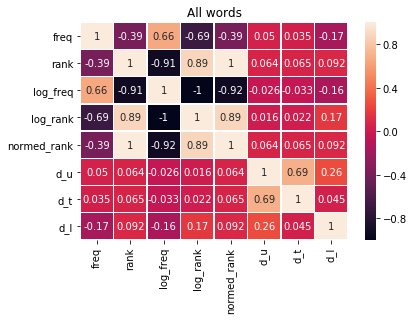

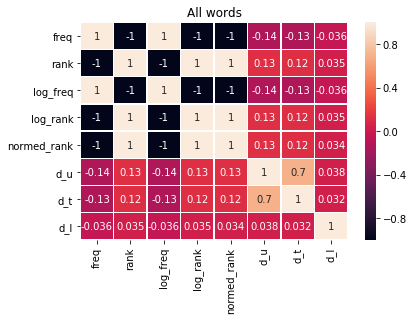

In [190]:
#full dataset: 
CorrMatrix(data, 'All words')
CorrMatrix(data, 'All words', 'spearman')

In [197]:
#generate groups: 
warriner = data[data['category'] == 'warriner']
standard = data[data['category'] == 'standard']
nonstandard = data[data['category'] == 'nonstandard']

#view sizes
name_dict = {'warriner': warriner, 'standard': standard, 'nonstandard': nonstandard}
for (k, v) in name_dict.items(): 
    print(k, "size:", v.shape[0])

warriner size: 308
standard size: 25
nonstandard size: 497


In [242]:
#sanity check for nonstandard words
display(nonstandard['word'])

4              wtf
7            hella
11         boxster
19             dsl
20          velcro
21             mah
80             ish
122           cust
132            asl
153        pikachu
177             fb
203           audi
290          cyber
306             gf
345           shat
396           wang
407           lmao
445           omfg
507          percy
550             ak
557      homophobe
598            ccg
599            tcg
617             jb
631          homie
633         prolly
635           jake
663          riley
675            idk
677             r6
           ...    
23442          3am
23715         bink
23820          tek
23821           td
23841          nov
23860          evo
23894     montreal
23908          smh
23918          xyz
23939         robo
24021         zion
24026           gi
24033       aussie
24048    warhammer
24108           hh
24127         thai
24149      canucks
24159       heaton
24312       shisha
24369     megatron
24409           cy
24420       

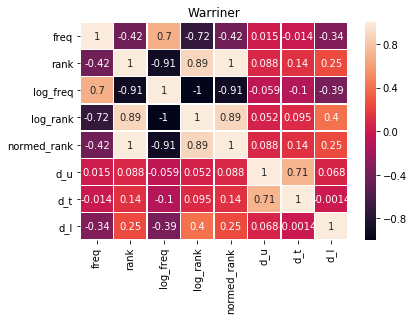

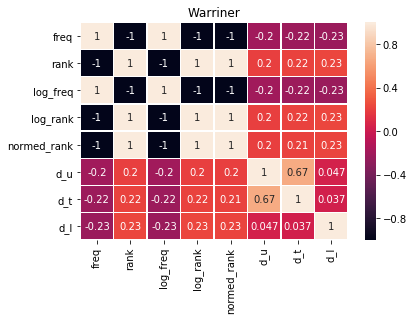

In [198]:
#just warriner: 
CorrMatrix(warriner, 'Warriner')
CorrMatrix(warriner, 'Warriner', 'spearman')

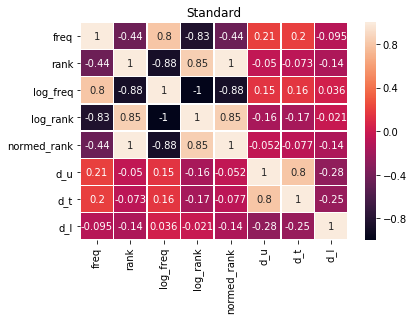

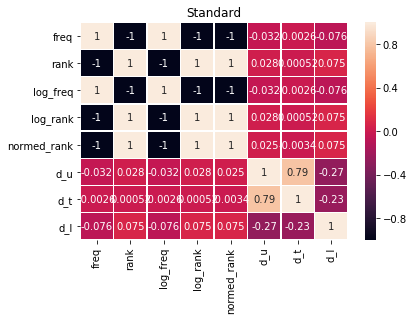

In [199]:
#standard: 
CorrMatrix(standard, 'Standard')
CorrMatrix(standard, 'Standard', 'spearman')

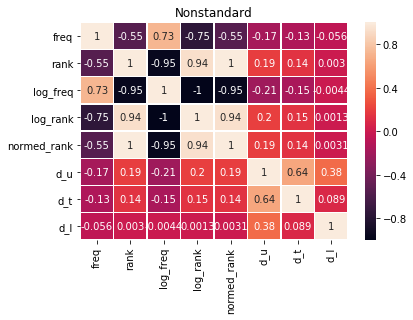

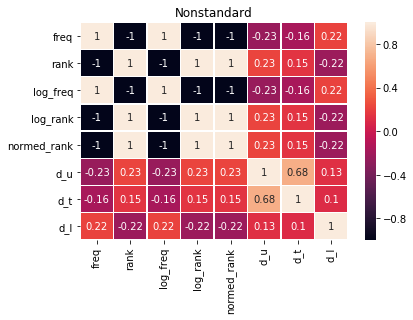

In [200]:
#standard: 
CorrMatrix(nonstandard, 'Nonstandard')
CorrMatrix(nonstandard, 'Nonstandard', 'spearman')

## Histograms: 

In [201]:
def DistPlot(title, groups, names=None): 
    corr_cols = ['freq', 'rank', 'normed_rank', 'd_u', 'd_t', 'd_l']
    corr_df = pd.DataFrame()

    for col in corr_cols: 
        for group in groups: 
            all_vals = itertools.chain.from_iterable([list(x.values()) for x in group[col].tolist()])
            no_na = pd.Series(list(all_vals)).dropna()
            ax = sns.distplot(no_na)
            ax.set_title(str(names) + ": " + col)
        plt.show()

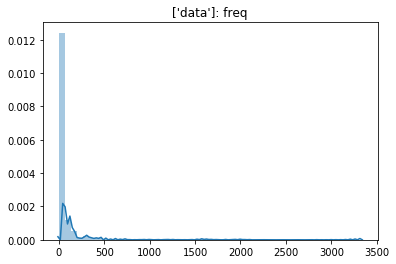

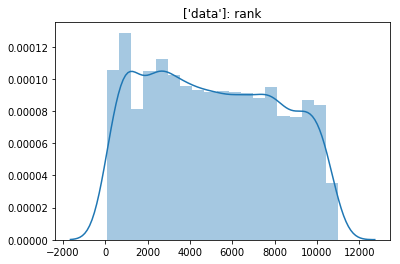

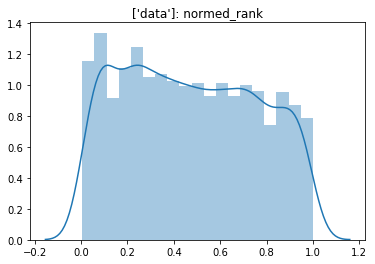

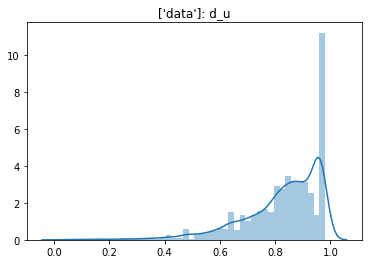

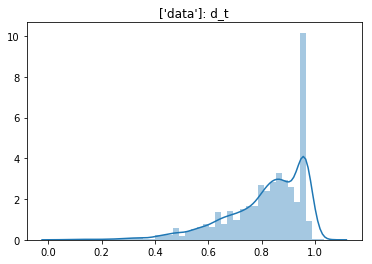

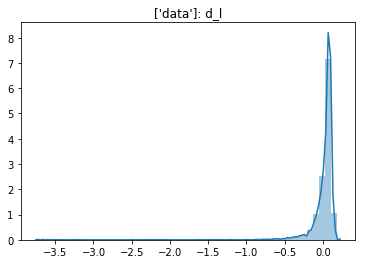

In [202]:
DistPlot('All values', [data], ['data'])

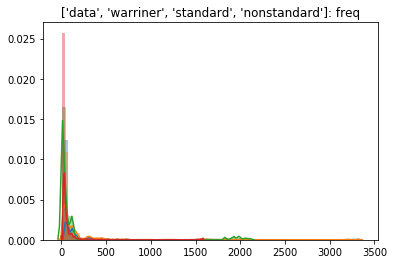

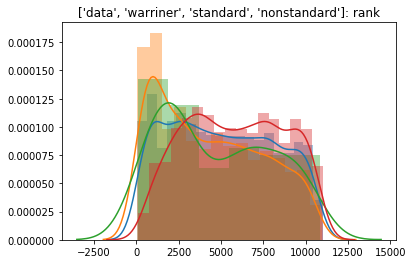

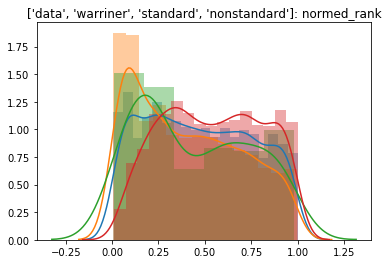

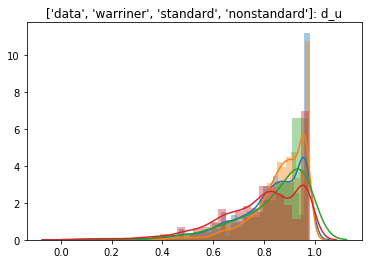

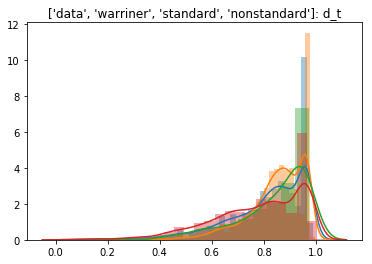

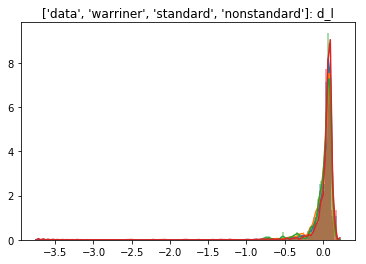

In [203]:
#distplot by group of words
DistPlot('All values', [data, warriner, standard, nonstandard], ['data', 'warriner', 'standard', 'nonstandard'])

## Time series plots of changes in metrics over each time step: 

In [234]:
def TimeSeries(in_df, measure): 
    time_df = pd.DataFrame(columns=['time', 'value'])

    time_df['time'] = list(itertools.chain.from_iterable(in_df[measure].map(lambda x: list(x.keys())).tolist()))
    time_df['value'] = list(itertools.chain.from_iterable(in_df[measure].map(lambda x: list(x.values())).tolist()))
    
    ax = sns.lineplot(x='time', y='value', data=time_df)
    ax.set_title(measure)
    plt.show()

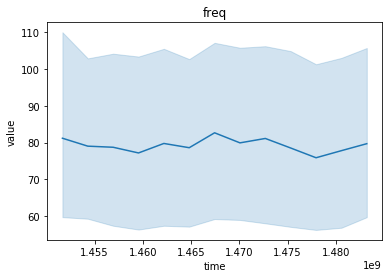

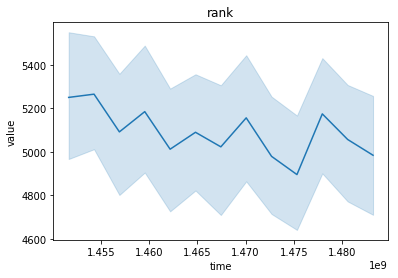

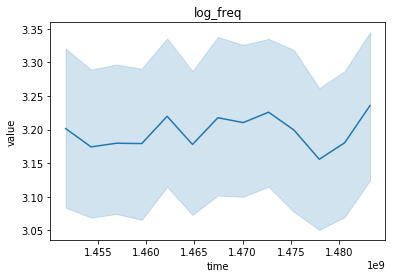

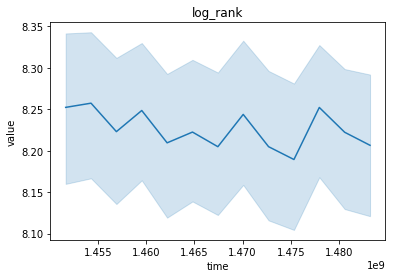

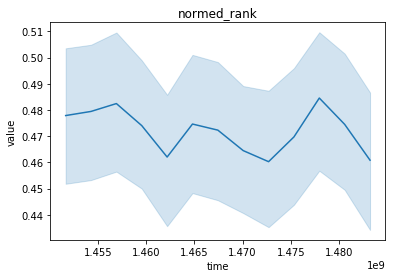

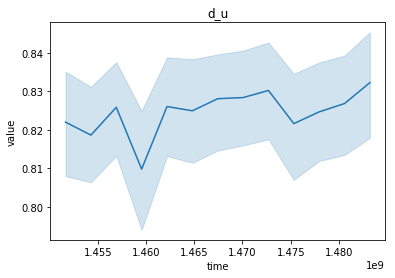

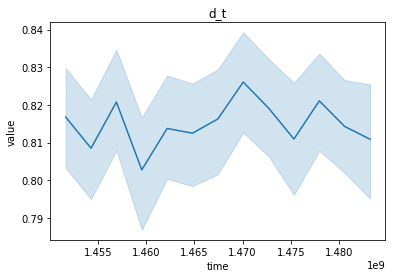

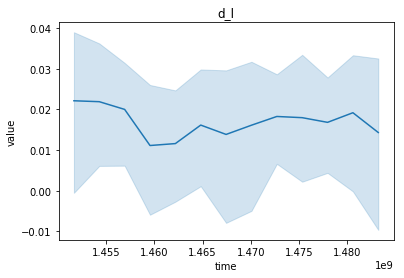

In [236]:
#for all data
time_cols = ['freq', 'rank', 'log_freq', 'log_rank', 'normed_rank', 'd_u', 'd_t', 'd_l']

for col in time_cols: 
    TimeSeries(data, col)

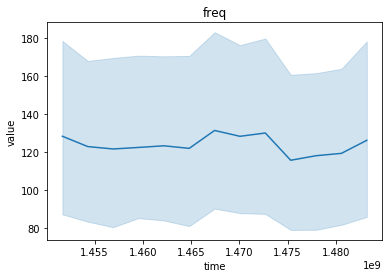

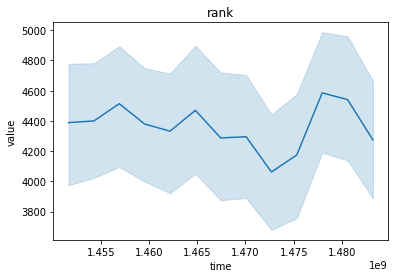

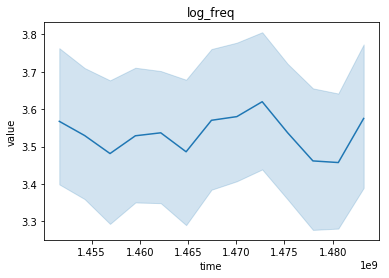

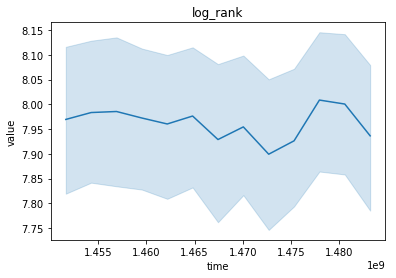

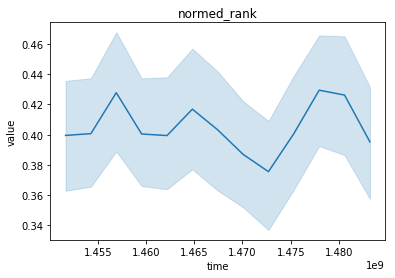

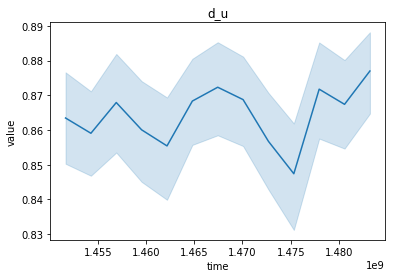

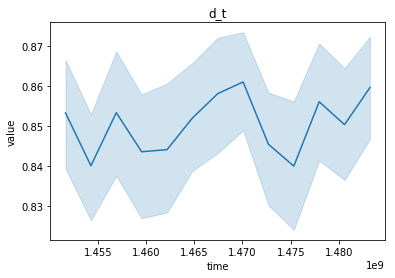

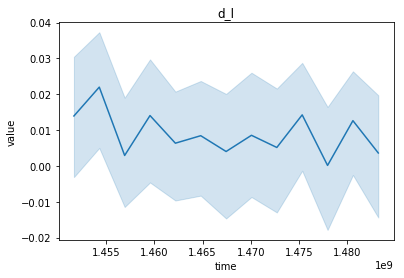

In [240]:
for col in time_cols: 
    TimeSeries(warriner, col)

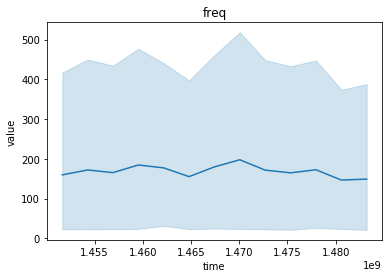

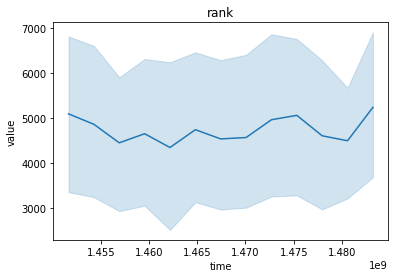

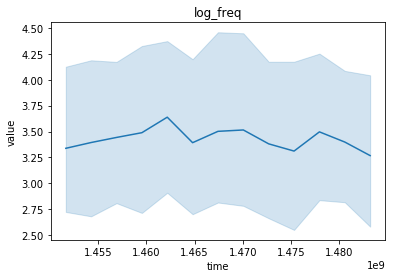

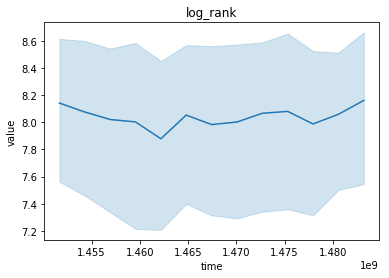

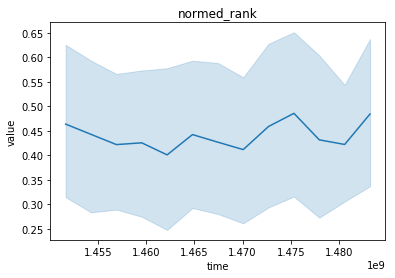

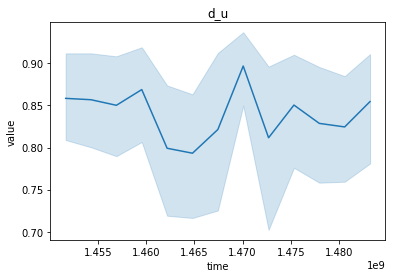

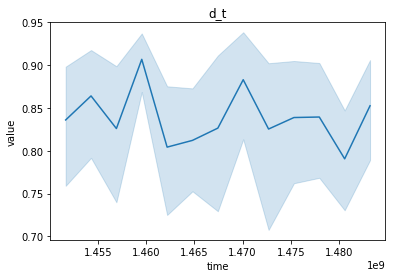

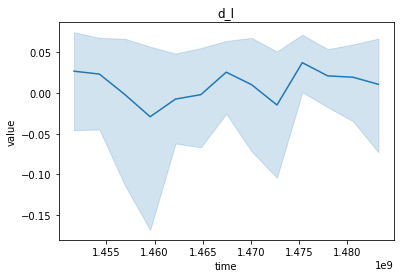

In [238]:
for col in time_cols: 
    TimeSeries(standard, col)

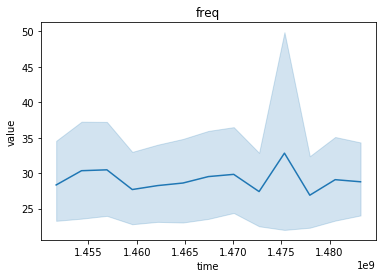

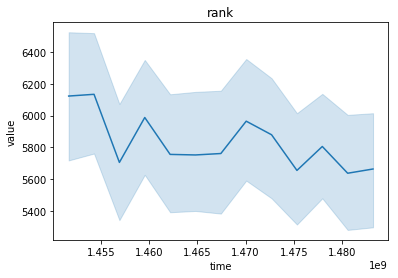

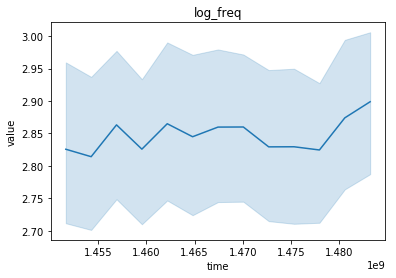

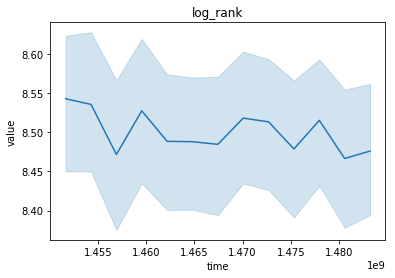

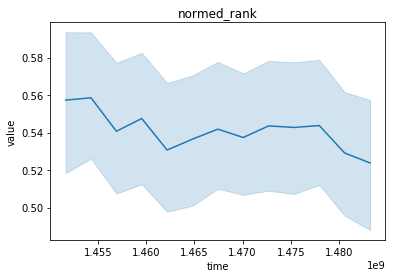

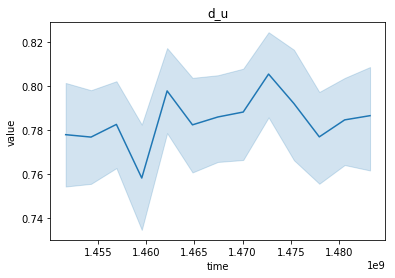

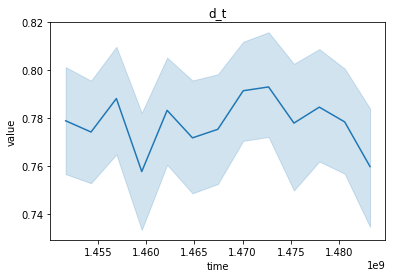

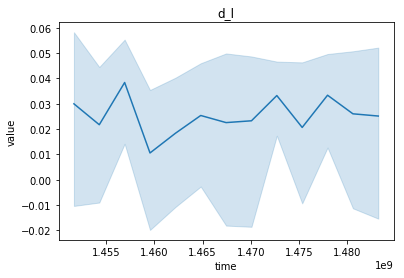

In [239]:
for col in time_cols: 
    TimeSeries(nonstandard, col)

# Predictive modeling: 

## Logistic regression: 

## Binary classification: 